# Unit 5 - Financial Planning


In [39]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [40]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [41]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [42]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [43]:
# Fetch current BTC price
response_data = requests.get(btc_url).json()
price_btc = response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_data = requests.get(eth_url).json()
price_eth = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15916.18
The current value of your 5.3 ETH is $2072.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [44]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [45]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [46]:
# Format current date as ISO format
now = pd.Timestamp("2020-10-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
data = alpaca.get_barset(
    tickers,
    timeframe,
    start = now,
    end = now
).df

# Preview DataFrame
data

AGG                                      SPY  \
                             open     high     low   close   volume   open   
time                                                                         
2020-10-28 00:00:00-04:00  117.81  117.955  117.72  117.73  5448671  332.1   

                                                                
                               high     low   close     volume  
time                                                            
2020-10-28 00:00:00-04:00  338.2483  326.13  326.67  107939571

In [47]:
# Pick AGG and SPY close prices
agg_close_price = data["AGG"]["close"][0]
spy_close_price = data["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.73
Current SPY closing price: $326.67


In [48]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16333.50
The current value of your 200 AGG shares is $23546.00


### Savings Health Analysis

In [49]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    [
        [my_btc_value + my_eth_value],
        [my_spy_value + my_agg_value]
    ],
    index = ["Crypto Value", "Stock Value"],
    columns = ["amount"]
)

# Display savings DataFrame
display(df_savings)

,amount
Crypto Value,17988.476
Stock Value,39879.500


<AxesSubplot:title={'center':'HSA Savings Portfolio Composition'}, ylabel='amount'>

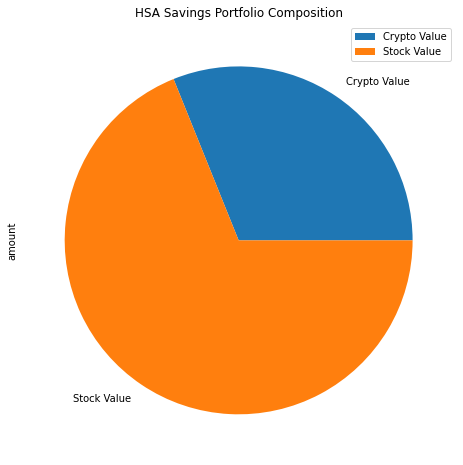

In [14]:
# Plot savings pie chart
df_savings.plot(kind = "pie", title = "HSA Savings Portfolio Composition", y = "amount", figsize = (8, 8))

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"]["Crypto Value"] + \
    df_savings["amount"]["Stock Value"]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations for having enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congratulations for reaching your financial goal.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from reaching your goal.")

Congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
portfolio_weights = [.4, .6]
mc = MCSimulation(
    portfolio_data = df_stock_data,
    weights = portfolio_weights,
    num_simulation = 500,
    num_trading_days = 30 * 252
)

In [19]:
# Printing the simulation input data
df_stock_data.head()
print(f"Monte Carlo simulation configured with {500} simulation runs and {30 * 252} trading days.")

Monte Carlo simulation configured with 500 simulation runs and 7560 trading days.


In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996730,0.996820,1.000329,1.004885,1.009560,0.992380,0.992540,0.995538,1.001954,1.003606,...,0.987423,0.987824,0.999671,1.001076,0.995681,1.003723,1.006892,1.009087,1.005329,0.992481
2,1.002441,0.992871,0.994697,1.011174,1.009834,0.988417,0.999632,0.984501,0.999788,0.996882,...,0.987010,0.988932,0.990732,1.000798,0.994706,1.009981,1.009090,1.007720,1.000761,0.990564
3,0.998883,0.988131,0.999625,1.015088,0.999135,0.987482,0.990204,0.988108,1.003444,0.999792,...,0.988562,0.984488,0.992850,0.995981,0.981800,1.013808,1.004957,1.008232,1.000977,0.998039
4,1.004323,0.996267,1.008238,1.026766,1.009646,0.982562,0.983383,0.982159,0.995230,0.994013,...,0.987211,0.984660,0.988362,0.992941,0.969437,1.000901,1.007560,1.003297,1.005385,1.013052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.846977,12.125260,8.928581,4.217098,13.619751,16.677527,4.052881,3.725652,2.901864,8.698641,...,2.114379,5.315723,1.555775,27.054135,6.647455,8.364529,17.510699,23.856021,5.510498,6.448849
7557,8.847502,12.171788,9.009731,4.200941,13.634884,16.627411,4.027473,3.732456,2.936969,8.616983,...,2.109744,5.293904,1.539699,26.962686,6.613866,8.377549,17.614543,23.606013,5.434643,6.507829
7558,8.805824,12.097870,9.102995,4.209052,13.831505,16.860550,4.021086,3.730698,2.954347,8.669653,...,2.078368,5.188813,1.526342,27.310492,6.630145,8.437791,17.454381,23.782563,5.426147,6.606226
7559,8.812791,12.082475,9.121419,4.211490,13.789475,16.987593,4.013980,3.745308,2.973491,8.720108,...,2.076137,5.224585,1.536391,27.396215,6.643086,8.479749,17.455638,23.689673,5.440122,6.628486


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

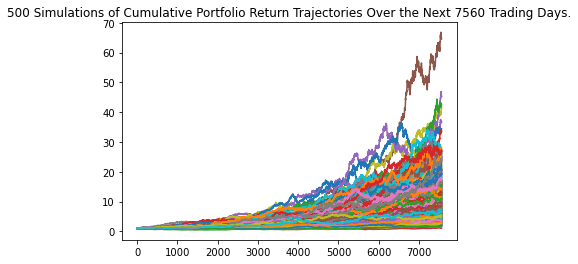

In [21]:
# Plot simulation outcomes
mc.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

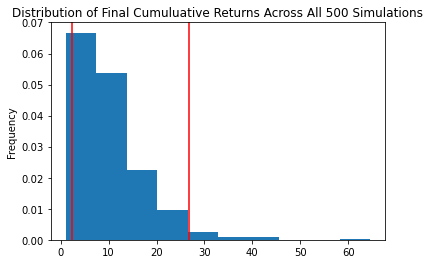

In [22]:
# Plot probability distribution and confidence intervals
mc.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = mc.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             10.166973
std               7.253507
min               1.030687
25%               4.997998
50%               8.402919
75%              13.075829
max              64.598523
95% CI Lower      2.376897
95% CI Upper     26.736561
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = summary_statistics[8] * initial_investment
ci_upper = summary_statistics[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47537.94857424996 and $534731.2226456132


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = summary_statistics[8] * initial_investment
ci_upper = summary_statistics[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71306.92286137494 and $802096.8339684199


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns\
portfolio_weights = [.15, .85]
mc_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = portfolio_weights,
    num_simulation = 500,
    num_trading_days = 5 * 252
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999021,0.993940,1.011040,1.013917,0.998724,0.979633,0.993781,0.982697,0.998564,1.009438,...,1.007157,0.994637,1.008928,0.997109,1.003689,1.000447,1.009519,0.997021,0.999943,1.005464
2,1.012211,0.984904,1.014754,1.018865,0.993331,0.970750,0.994120,0.981987,0.991340,1.011483,...,0.991673,0.997169,0.999819,0.994853,0.994005,0.985606,1.024716,1.005073,0.977283,1.026140
3,0.999976,0.991958,1.012869,1.001847,1.012259,0.975369,1.004311,0.944760,0.995742,0.998156,...,1.000827,1.020357,0.996284,1.006115,1.004687,0.992844,1.023630,0.987579,0.975512,1.016596
4,0.988654,1.008030,1.017007,1.002757,1.012059,0.984591,0.992019,0.926067,0.993133,1.002158,...,0.998108,1.007911,1.000889,1.006182,1.027152,1.000934,1.013697,0.986572,0.969743,1.017689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.109404,2.394995,2.625518,2.524997,1.592068,0.950684,1.609835,2.725538,1.499895,2.795891,...,1.208150,1.252020,1.923837,1.571401,1.928081,2.749528,0.849812,1.277004,1.227625,1.685161
1257,2.115703,2.448856,2.653416,2.541806,1.568637,0.933774,1.660292,2.678800,1.508306,2.794153,...,1.191235,1.252063,1.938967,1.555946,1.913848,2.784154,0.844324,1.268030,1.253634,1.701268
1258,2.120104,2.449162,2.617473,2.556353,1.568602,0.925669,1.665236,2.692632,1.511705,2.779392,...,1.174188,1.261255,1.953061,1.560734,1.936326,2.782860,0.856118,1.247799,1.266533,1.664348
1259,2.100394,2.473033,2.659769,2.574521,1.571723,0.926694,1.666878,2.655707,1.522876,2.770719,...,1.177258,1.265614,1.950869,1.577073,1.941743,2.801362,0.857839,1.242265,1.281000,1.646416


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

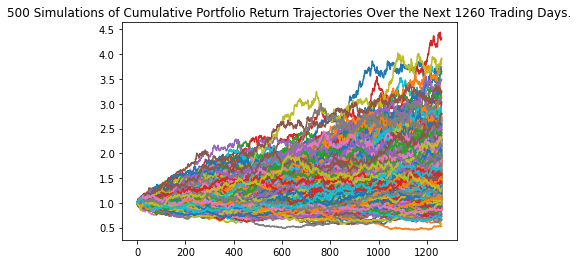

In [28]:
# Plot simulation outcomes
mc_5_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

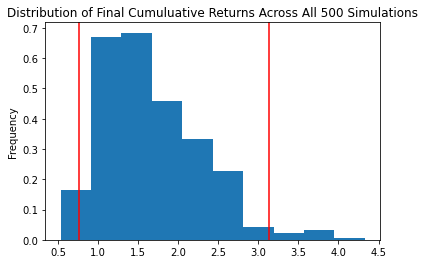

In [29]:
# Plot probability distribution and confidence intervals
mc_5_years.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_5_years = mc_5_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_5_years)

count           500.000000
mean              1.673626
std               0.622897
min               0.528071
25%               1.203967
50%               1.566770
75%               2.044283
max               4.329786
95% CI Lower      0.758701
95% CI Upper      3.127839
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = summary_statistics_5_years[8] * initial_investment
ci_upper_five = summary_statistics_5_years[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15174.0247824561 and $62556.781348960285


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
portfolio_weights = [.45, .55]
mc_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = portfolio_weights,
    num_simulation = 500,
    num_trading_days = 10 * 252
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998600,0.995145,1.011671,1.008266,0.996892,0.993616,1.006417,0.995045,0.998790,0.994364,...,0.984170,1.001937,1.010146,1.004541,1.008105,0.991537,0.991874,1.011278,1.005714,1.004236
2,1.002081,1.000061,1.014326,1.011350,0.989350,1.006833,1.009674,1.000919,0.995195,1.003894,...,0.992510,1.005688,1.002031,1.006710,1.018903,0.992702,0.994455,1.007911,0.999750,1.020273
3,1.007718,1.001070,1.021615,1.006530,0.993978,1.013277,1.018239,1.002120,0.996879,1.018852,...,1.007614,1.013861,0.999878,1.007903,1.031353,0.974943,1.008435,1.009756,1.006516,1.026087
4,1.008752,1.002580,1.017208,0.999140,1.008588,1.014370,1.028443,1.000434,1.001852,1.021049,...,1.011069,1.030237,0.993657,1.008194,1.034450,0.973973,0.996365,1.014927,1.003042,1.029565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.075278,2.123365,1.735407,1.632413,1.824693,3.965283,0.954499,1.820590,1.518153,2.880113,...,2.778414,2.791699,1.728477,2.018917,2.059132,1.786104,1.472434,4.215124,1.358947,1.957989
2517,1.071534,2.141946,1.723060,1.640138,1.813379,3.984049,0.950022,1.835084,1.515875,2.875716,...,2.802144,2.784485,1.715310,2.013198,2.069890,1.801863,1.475130,4.221043,1.361085,1.951705
2518,1.069257,2.147443,1.720146,1.624068,1.824521,4.024591,0.961472,1.836967,1.507651,2.881835,...,2.820464,2.786124,1.696425,2.023393,2.083910,1.821798,1.472343,4.182245,1.383081,1.929840
2519,1.072987,2.106940,1.715871,1.619564,1.827306,4.061527,0.967443,1.857899,1.505292,2.863838,...,2.811441,2.762477,1.690895,2.026358,2.083993,1.806098,1.463992,4.166509,1.388070,1.920839


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

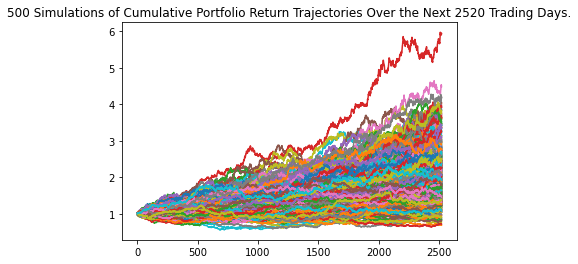

In [34]:
# Plot simulation outcomes
mc_10_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

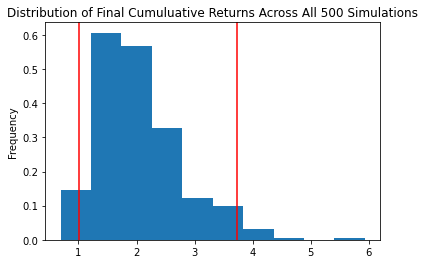

In [35]:
# Plot probability distribution and confidence intervals
mc_10_years.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_10_years = mc_10_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_10_years)

count           500.000000
mean              2.019525
std               0.720138
min               0.690894
25%               1.504291
50%               1.873538
75%               2.416358
max               5.933424
95% CI Lower      1.004190
95% CI Upper      3.725029
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = summary_statistics_10_years[8] * initial_investment
ci_upper_ten = summary_statistics_10_years[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20083.808540893995 and $74500.58469990769
